In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
#데이터 분리
data1=pd.read_excel('x_data.xls') #엑셀 불러옴
data2=pd.read_excel('y_data.xls') #엑셀 불러옴
data3=pd.read_excel('speed.xls') #엑셀 불러옴
data1.head() #파일 확인
data2.head()
data3.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.66,8.06225774829855,0.67,0.68,8.54400374531753,0.69,0.70,8.06225774829855.1,0.71,6.324555320336759
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.123106,0.000000,0.0,3.162278,0.000000,1.000000,0.0,0.000000,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,3.605551,0.0,0.000000,2.236068,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.414214,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.162278,0.000000,0.0,3.162278,0.000000,3.605551,0.0,2.828427,0.0


In [3]:
pddata1=pd.DataFrame(data1) 
pddata1.head()
pddata2=pd.DataFrame(data2) 
pddata2.head()
pddata3=pd.DataFrame(data3) 
pddata3.head()

hap=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])
    s_data=np.array(pddata3.loc[j])

    hap1=[] #[x,y,속력] 데이터를 저장하고 있는 리스트

    for i in range(len(s_data)): 
        sum=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum.append(x_data[i]) #x넣음
        sum.append(y_data[i]) #y넣음
        sum.append(s_data[i]) #속력넣음
        hap1.append(sum) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    hap.append(hap1)

In [4]:
hap

[[[388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 0.0],
  [388, 252, 1.0],
  [389, 252, 0.0],
  [389, 252, 2.0],
  [389, 254, 0.0],
  [389, 254, 3.1622776601683795],
  [388, 257, 0.0],
  [388, 257, 0.0],
  [388, 257, 4.242640687119285],
  [385, 260, 0.0],
  [385, 260, 0.0],
  [385, 260, 3.605551275463989],
  [382, 262, 0.0],
  [382, 262, 3.605551275463989],
  [379, 264, 0.0],
  [379, 264, 5.0],
  [375, 267, 0.0],
  [375, 267, 5.656854249492381],
  [371, 271, 0.0],
  [371, 271, 6.708203932499369],
  [365, 274, 0.0],
  [365, 274, 0.0],
  [365, 274, 7.810249675906654],
  [359, 279, 0.0],
  [359, 279, 7.0710678118654755],
  [354, 284, 0.0],
  [354, 284,

In [4]:
TRAIN_SPLLIT = 300000
tf.random.set_seed(13)

pddata1.plot(subplots=True)

In [8]:
maxlen = 100 #x 좌표 : 버튼 하나당 99길이의 데이터
step = 3 # 세개씩 건너뛰면서 새로운 시퀀스 샘플링

sentences = [] #추출한 시퀀스를 담을 리스트
next_chars = [] #타깃(시퀀스 다음 글자)를 담을 리스트

for i in range(0, len(pddata1)-maxlen, step):
    sentences.append(pddata1[i:i+maxlen])
    next_chars.append(pddata1[i+maxlen])
    
print('시퀀스 개수:', len(sentences))

KeyError: 100

In [ ]:
chars = sorted()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7E95F3348>,
      dtype=object)

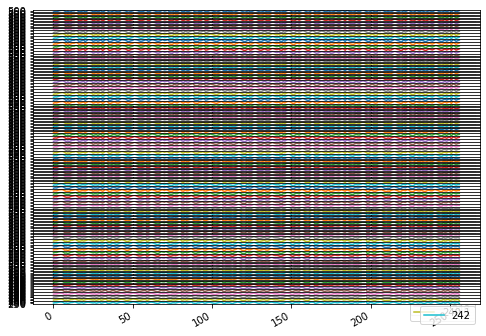

In [8]:
pddata2.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7E20DFE88>,
      dtype=object)

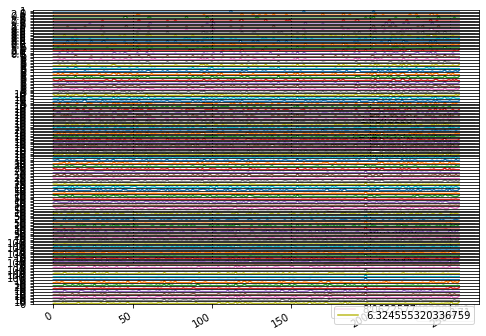

In [6]:
pddata3.plot(subplots=True)

In [9]:
df1=pd.DataFrame(hap)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,"[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]","[388, 252, 0.0]",...,"[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]","[224, 357, 0.0]"
1,"[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]","[210, 371, 0.0]",...,"[327, 424, 0.0]","[327, 424, 4.123105625617661]","[331, 425, 0.0]","[331, 425, 0.0]","[331, 425, 3.1622776601683795]","[334, 426, 0.0]","[334, 426, 1.0]","[335, 426, 0.0]","[335, 426, 0.0]","[335, 426, 2.0]"
2,"[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]","[563, 328, 0.0]",...,"[411, 429, 0.0]","[411, 429, 0.0]","[411, 429, 3.605551275463989]","[408, 431, 0.0]","[408, 431, 0.0]","[408, 431, 2.23606797749979]","[407, 433, 0.0]","[407, 433, 0.0]","[407, 433, 0.0]","[407, 433, 0.0]"
3,"[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]","[389, 440, 0.0]",...,"[263, 539, 0.0]","[263, 539, 0.0]","[263, 539, 1.4142135623730951]","[262, 540, 0.0]","[262, 540, 0.0]","[262, 540, 0.0]","[262, 540, 0.0]","[262, 540, 0.0]","[262, 540, 0.0]","[262, 540, 0.0]"
4,"[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]","[228, 554, 0.0]",...,"[341, 608, 0.0]","[341, 608, 3.1622776601683795]","[344, 609, 0.0]","[344, 609, 0.0]","[344, 609, 3.1622776601683795]","[347, 610, 0.0]","[347, 610, 3.605551275463989]","[350, 612, 0.0]","[350, 612, 2.8284271247461903]","[352, 614, 0.0]"


In [11]:
from sklearn.model_selection import train_test_split # 데이터 셋 분할
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

Y = df1

X_train = np.asarray(df1[:-100].values.tolist(), dtype=np.float64)
X_test = np.asarray(df1[-100:].values.tolist(), dtype=np.float64)

Y_train = Y[:-100]
Y_test = Y[-100:]

X_train = X_train[:1700]
Y_train = Y_train[:1700]

model = Sequential()
model.add(LSTM(128, input_shape=(99,3),return_sequences=True)) # (timestep, feature)
model.add(LSTM(256, return_sequences=True))
model.add(Dense(99, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(X_train, Y_train, epochs=10, batch_size=1, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 99, 128)           67584     
_________________________________________________________________
lstm_4 (LSTM)                (None, 99, 256)           394240    
_________________________________________________________________
dense_2 (Dense)              (None, 99, 99)            25443     
Total params: 487,267
Trainable params: 487,267
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_2 to have 3 dimensions, but got array with shape (157, 99)

In [13]:
#many-to-one 유형의 LSTM 예시다. 시계열 x = {1,2,3,4,5}가 주어졌을 때 y={6}이 나오도록 학습시키는 가장 단순한 형태

from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[6.]])


xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3)(xInput)
xOutput = Dense(1)(xLstm)


model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

model.fit(x, y, epochs=50, batch_size=1, verbose=0)
model.predict(x, batch_size=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 1)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


array([[-0.7911675]], dtype=float32)

In [17]:
# 시계열 x = {1,2,3,4,5}가 주어졌을 때 y={2,3,4,5,6}이 나오도록 학습시키는 형태
# 단층-단방향 & many-to-many 유형

from keras.models import Model
from keras.layers import Input, Dense, LSTM, TimeDistributed
import numpy as np

from keras import backend as K
  

x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[6.]])
xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3, return_sequences=True)(xInput)
xReduced = Lambda(lambda z: K.mean(z, axis=1))(xLstm)
xOutput = Dense(1)(xReduced)

model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 5, 1)              0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 3)              60        
_________________________________________________________________
lambda_1 (Lambda)            (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None
